<a href="https://colab.research.google.com/github/MykoChan123/AdvancePredictiveAnalytiics/blob/main/activitycauseofdeath.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

In [3]:
df=pd.read_csv ("https://raw.githubusercontent.com/MykoChan123/AdvancePredictiveAnalytiics/main/cause_of_deaths.csv")

In [4]:
df.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


In [5]:
Data = df [['Year','Drowning']].values

<ipython-input-6-fe809bf5742c>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Data[:, 0], Data[:, 1], s=50, cmap='viridis')


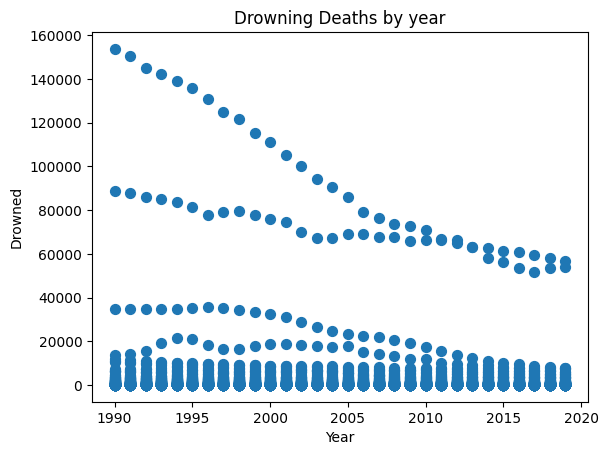

In [6]:
plt.scatter(Data[:, 0], Data[:, 1], s=50, cmap='viridis')
plt.title("Drowning Deaths by year")
plt.xlabel("Year")
plt.ylabel("Drowned")
plt.show()

In [7]:
kmeans = KMeans(n_clusters=3, random_state=42)
predicted_labels = kmeans.fit_predict(Data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [8]:
df = df.set_index('Year','Drowning')
df.index = pd.to_datetime(df.index)

<ipython-input-8-057e0830f52c>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only.
  df = df.set_index('Year','Drowning')


In [9]:
def create_features(df):
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.day_of_week
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['dayofyear'] = df.index.dayofyear
    return df

df = create_features(df)


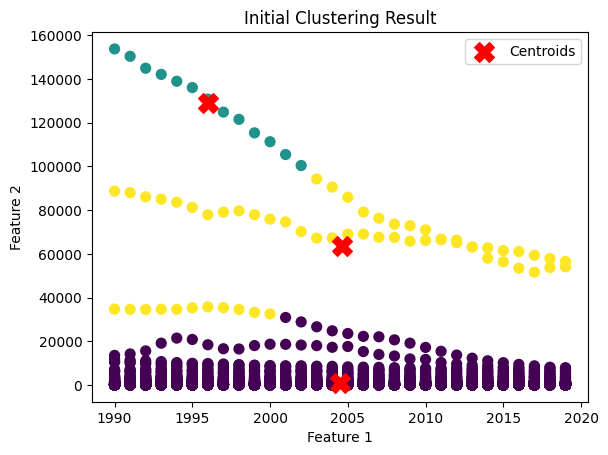

In [10]:
plt.scatter(Data[:, 0], Data[:, 1], c=predicted_labels, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title("Initial Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

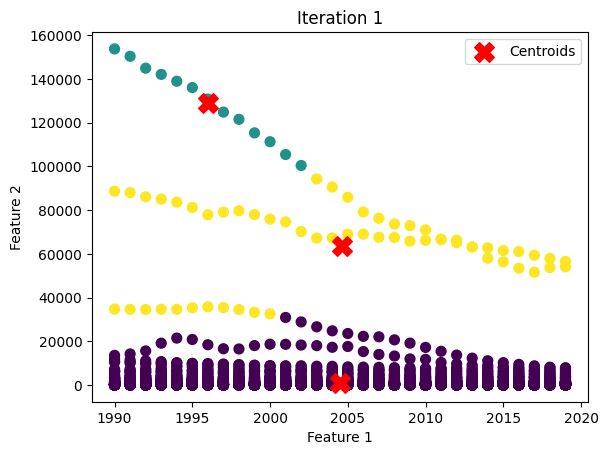

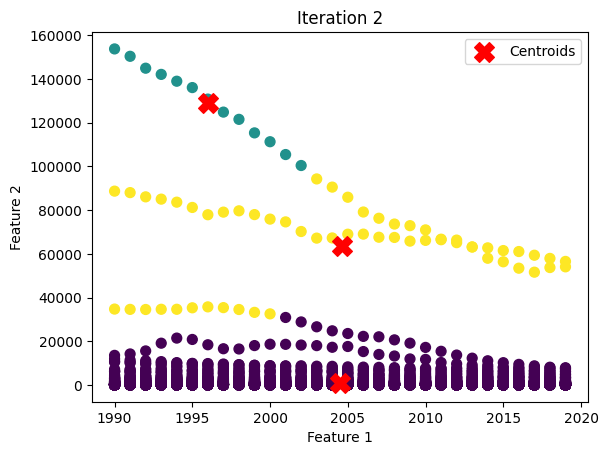

In [11]:
for iteration in range(2):  # Repeat for a few iterations (you can adjust this number)
    # Step 3: Reassign Data Points
    predicted_labels = kmeans.predict(Data)

    # Step 4: Update Centroids
    kmeans.cluster_centers_ = np.array([Data[predicted_labels == i].mean(axis=0) for i in range(kmeans.n_clusters)])

    # Visualization
    plt.scatter(Data[:, 0], Data[:, 1], c=predicted_labels, s=50, cmap='viridis')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
    plt.title(f"Iteration {iteration + 1}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()